In [0]:

#All the packages you will need
from pandas import read_csv
from numpy import fft
import numpy as np
import scipy.signal as signal
from numpy import arange
from numpy import math
import matplotlib.pyplot as plt
import matplotlib as mpl



In [0]:
#Read in data from website
data=read_csv('https://www.ndbc.noaa.gov/data/realtime2/41113.txt',header=0,delim_whitespace=True,skiprows=[1,1],usecols=[3,14])

In [6]:
#Check to make sure the data was read in OK
data

,hh,WTMP
0,18,18.5
1,18,18.5
2,17,18.5
3,17,18.5
4,16,18.5
...,...,...
1986,2,21.8
1987,1,21.8
1988,1,21.8
1989,0,21.8


In [0]:
#Need to flip data because data file reads first data row as most recent value
dataflip=np.flipud(data)

In [0]:
#Here we are aliasing the data since the data output is every half hour and we want every hour
wtmp=dataflip[::2,1]
hr=dataflip[::2,0]

**First, let's plot the whole 45-day time series**

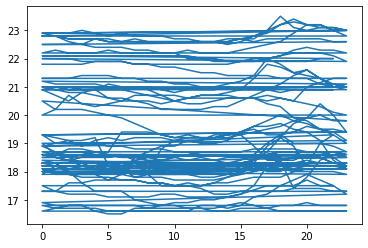

In [52]:
plt.plot(hr,wtmp);

**Notice that the data is all over the place. This is because we need a continuous hour vector whereas "hr" repeats itself daily**

In [0]:
#we need to get a continuous hourly vector since "hr" repeats itself
#len(hr) is the length of the hr vector so we want a vector the length from index 0 to length of "hr" for every hour (1)
hrly=arange(0,len(hr),1)

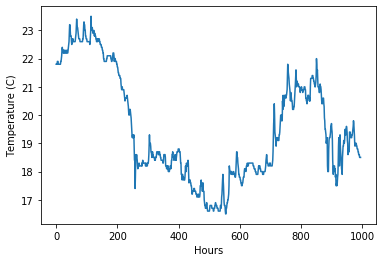

In [58]:
#Now lets plot the full data range
plt.plot(hrly,wtmp);
plt.xlabel('Hours');
plt.ylabel('Temperature (C)');

In [0]:
#Here we are creating a subset of data just for the first week - there is better way to do this but this is the quickest
wtmpsub=wtmp[:334]
hrsub=hr[:334]
#need to subset the "hrly" time vector too to plot
hrlysub=hrly[:334]

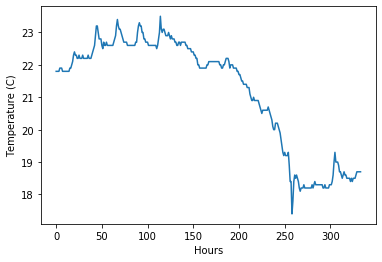

In [60]:
#Let's plot 1 week of data
plt.plot(hrlysub,wtmpsub)
plt.xlabel('Hours');
plt.ylabel('Temperature (C)');

**Now let's plot a histogram. This will help us identify if there is any sort of distrubution of water temperatures**

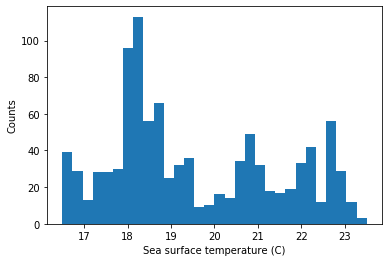

In [28]:
#Use the hist function to plot a histogram with 30 bins
plt.hist(wtmp,bins=30);
plt.xlabel('Sea surface temperature (C)');
plt.ylabel('Counts');

In [46]:
#Get the mean and standard deviation of the water temperature data over the week period
mean_wtmp=np.mean(wtmp)
mean_wtmp


19.524899598393574

In [47]:
std_wtmp=np.std(wtmp)
std_wtmp

1.8985786508685845

**Next we can utilize python's periodogram function as well as the FFT function to estimate power spectral density to see if we can identify phenomena over the week time period of the data**

In [0]:
#Get the temperature vector size
L=wtmpsub.size

In [0]:
# Calculate the sampling frequency
Fs=1/3600
# Calculating the midpoint (upfreq) of the sampling frequency and the frequency interval (frequint) (using this later)
upfreq=Fs/2
freqint=Fs/L

In [0]:
#Let's utilizing pythons periodogram function to estimate power spectral density first
f,pper_spec=signal.periodogram(wtmpsub,Fs,'flattop',scaling='spectrum')
speclen=pper_spec.size-1

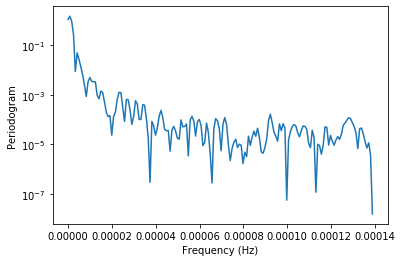

In [26]:
#Plotting what we calculated above
plt.semilogy(f,pper_spec);
plt.xlabel('Frequency (Hz)');
plt.ylabel('Periodogram');

In [0]:
#Now let's try estimating power spectral density without python's fancy function

#Using python's fast fourier transform function
xdft=fft.fft(wtmpsub)
#We will subset the fft to the positive side of the spectrum
halfL=L/2
xdftsub=xdft[0:int(halfL)+1]

In [0]:
#Estimate power spectral density using half the FFT
psd=(1/(Fs*L))*abs(xdftsub)**2
#Length of psd vector
psdL=psd.size

In [0]:
# We don't want to lose the power from the subset so here we multipy by 2 for the other half of the spectrum we aren't plotting
psd[2:int(L)-1]=2*psd[2:int(L)-1]


In [0]:
#Create a frequency vector for half the frequency spectrum (upfreq)
freq=arange(0,upfreq,freqint)

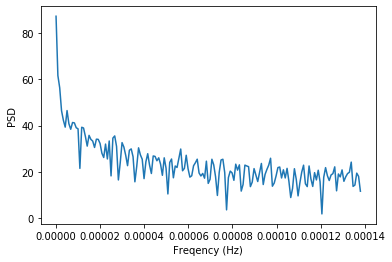

In [44]:
plt.plot(freq,10*np.log10(psd[0:psdL-1])) ;
plt.xlabel('Freqency (Hz)');
plt.ylabel('PSD');
